In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
52703,56.972999572753906,24.132699966430664,2024-12-05 16:47:59
52704,56.973,24.1327,2024-12-05 16:50:50
52705,56.9549560546875,24.154069900512695,2024-12-05 16:51:16
52706,56.98869323730469,24.298234939575195,2024-12-05 16:51:46


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
52703,56.972999572753906,24.132699966430664,2024-12-05 16:47:59,2024-12-05 16
52704,56.973,24.1327,2024-12-05 16:50:50,2024-12-05 16
52705,56.9549560546875,24.154069900512695,2024-12-05 16:51:16,2024-12-05 16
52706,56.98869323730469,24.298234939575195,2024-12-05 16:51:46,2024-12-05 16


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

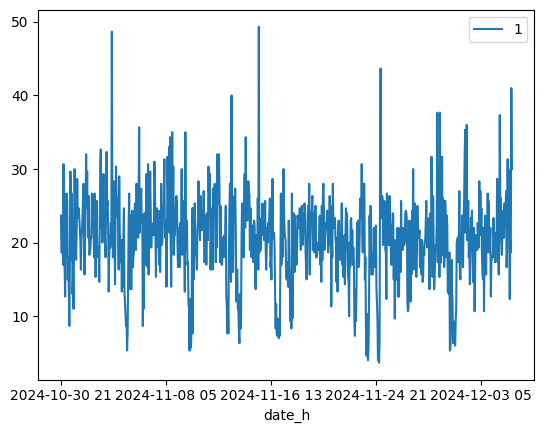

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


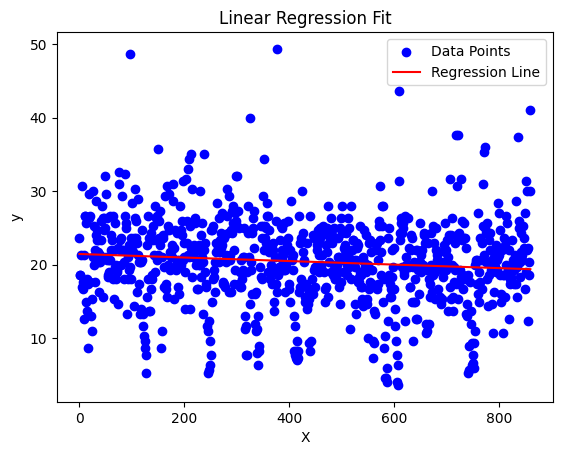

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[21.46078654],
       [21.45838531],
       [21.45598407],
       [21.45358284],
       [21.45118161],
       [21.44878038],
       [21.44637915],
       [21.44397791],
       [21.44157668],
       [21.43917545],
       [21.43677422],
       [21.43437299],
       [21.43197175],
       [21.42957052],
       [21.42716929],
       [21.42476806],
       [21.42236682],
       [21.41996559],
       [21.41756436],
       [21.41516313],
       [21.4127619 ],
       [21.41036066],
       [21.40795943],
       [21.4055582 ],
       [21.40315697],
       [21.40075574],
       [21.3983545 ],
       [21.39595327],
       [21.39355204],
       [21.39115081],
       [21.38874958],
       [21.38634834],
       [21.38394711],
       [21.38154588],
       [21.37914465],
       [21.37674342],
       [21.37434218],
       [21.37194095],
       [21.36953972],
       [21.36713849],
       [21.36473726],
       [21.36233602],
       [21.35993479],
       [21.35753356],
       [21.35513233],
       [21